In [27]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.target import FeatureCorrelation
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
music = pd.read_csv("data.csv", on_bad_lines="skip")
music = music.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
music['artists'] = music['artists'].apply(lambda x: ast.literal_eval(x))
genres = pd.read_csv("data_w_genres.csv", on_bad_lines="skip")
genres['genres'] = genres['genres'].apply(lambda x: ast.literal_eval(x))

# Explode the artist column to create one row per artist
df = music.explode('artists')
# Merge the two DataFrames
music_w_genres = pd.merge(df, genres[['genres', 'artists']], on='artists', how='left')

In [29]:
headings = ['user_id', 'artists', 'name', 'playlist']
playlist = pd.read_csv("spotify_dataset.csv", names=headings, on_bad_lines="skip")

data = playlist[['user_id', 'playlist', 'name']].merge(music_w_genres, how='inner', on='name')
data = data[(data['id'] != '7zwHsmRERRkjE10hxuMpEo') & (data['id'] != '5htUdv9kMaGD9VApOUf6ZF')]

data.head()

,user_id,playlist,name,valence,year,acousticness,artists,danceability,duration_ms,energy,...,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,genres
0,9cc0cfd4d7d7885102480dd99e7a90d6,HARD ROCK 2010,(The Angels Wanna Wear My) Red Shoes,0.901,1977,0.0556,Elvis Costello,0.577,167680,0.636,...,0.00016,4,0.226,-9.825,1,37,1977-07-22,0.0491,134.768,"[art rock, dance rock, folk, folk rock, lilith..."
1,ec6a9abc7a818b0c00788add9ec69c58,Starred,(The Angels Wanna Wear My) Red Shoes,0.901,1977,0.0556,Elvis Costello,0.577,167680,0.636,...,0.00016,4,0.226,-9.825,1,37,1977-07-22,0.0491,134.768,"[art rock, dance rock, folk, folk rock, lilith..."
2,7cae243a6e617bbac43848e587cf0177,Elvis Costello – The Best Of The First 10 Years,(The Angels Wanna Wear My) Red Shoes,0.901,1977,0.0556,Elvis Costello,0.577,167680,0.636,...,0.00016,4,0.226,-9.825,1,37,1977-07-22,0.0491,134.768,"[art rock, dance rock, folk, folk rock, lilith..."
3,6850dd8323fec9eecb29ce17bb967f2c,Glastonbury Pyramid 2013,(The Angels Wanna Wear My) Red Shoes,0.901,1977,0.0556,Elvis Costello,0.577,167680,0.636,...,0.00016,4,0.226,-9.825,1,37,1977-07-22,0.0491,134.768,"[art rock, dance rock, folk, folk rock, lilith..."
4,0098b965803a4c10723f8e216f9e0904,Friction,(The Angels Wanna Wear My) Red Shoes,0.901,1977,0.0556,Elvis Costello,0.577,167680,0.636,...,0.00016,4,0.226,-9.825,1,37,1977-07-22,0.0491,134.768,"[art rock, dance rock, folk, folk rock, lilith..."


/var/folders/2c/db_0lrw50h16d5cqvl89fg3c0000gn/T/ipykernel_48077/2058377827.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data[['popularity','danceability','duration_ms','energy','explicit','instrumentalness', 'key', 'liveness', 'loudness','release_date','speechiness','tempo']].corr()


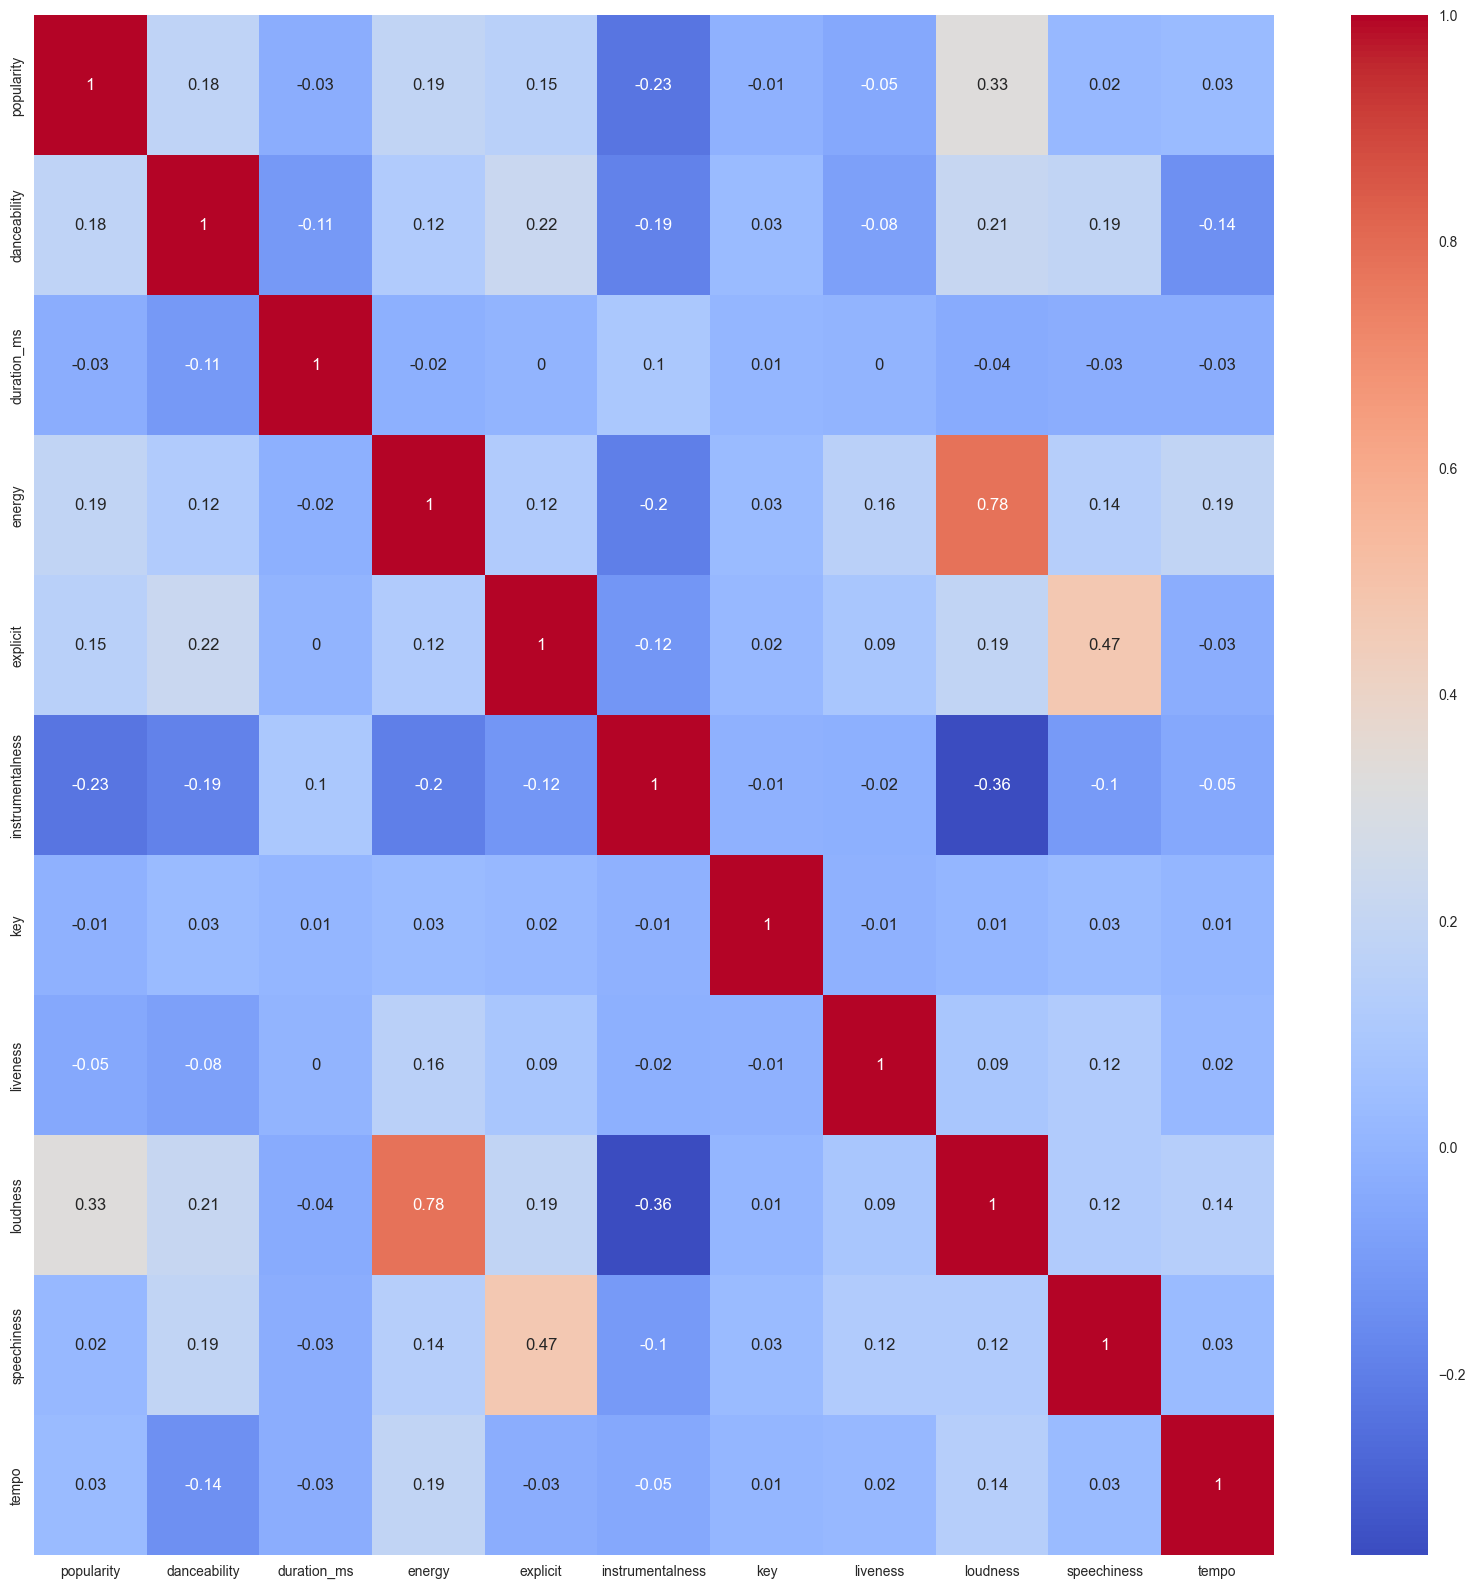

In [30]:
# Calculate the correlation matrix
corr_matrix = data[['popularity','danceability','duration_ms','energy','explicit','instrumentalness', 'key', 'liveness', 'loudness','release_date','speechiness','tempo']].corr()
corr_matrix = corr_matrix.round(2)

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

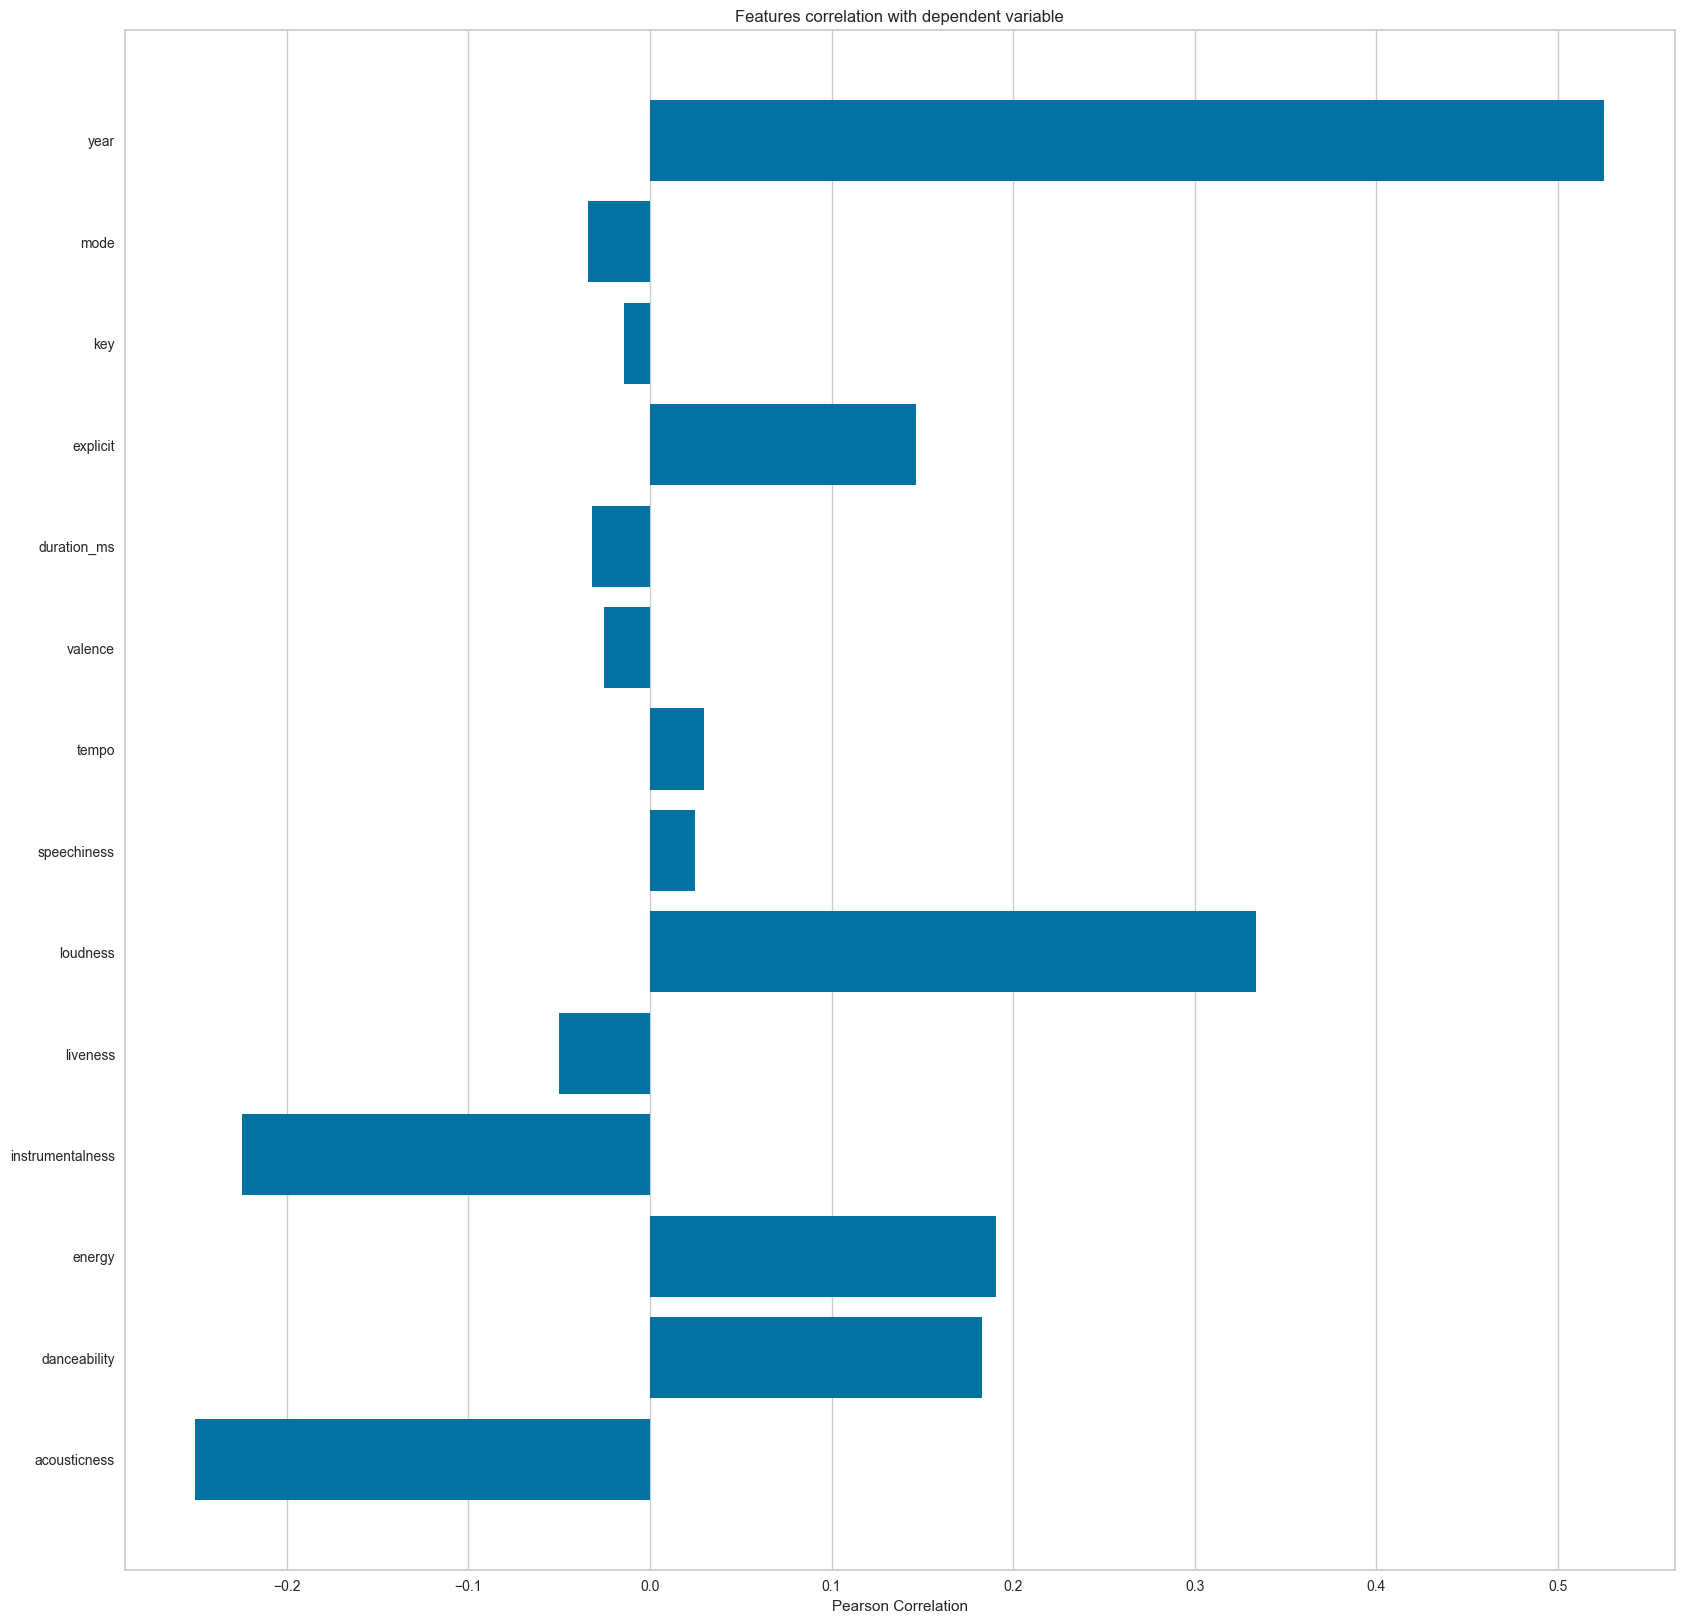

<AxesSubplot: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [31]:
data_by_genre = pd.read_csv("data_by_genres.csv", on_bad_lines="skip")
# top10_genres = data_by_genre.nlargest(10, 'popularity')

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [32]:
top10_genres = data_by_genre.nlargest(10, 'popularity')
top10_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
237,1,basshall,0.213167,0.818,169799.166667,0.630167,0.000020,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
2533,1,south african house,0.043833,0.847,311854.333333,0.562333,0.130339,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2755,1,trap venezolano,0.044600,0.877,231848.000000,0.777000,0.000035,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
2778,0,turkish edm,0.008290,0.698,186700.000000,0.719000,0.000004,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
46,0,alberta hip hop,0.330000,0.885,144000.000000,0.685000,0.000000,0.148000,-6.429000,0.062700,99.954000,0.937000,78.500000,11


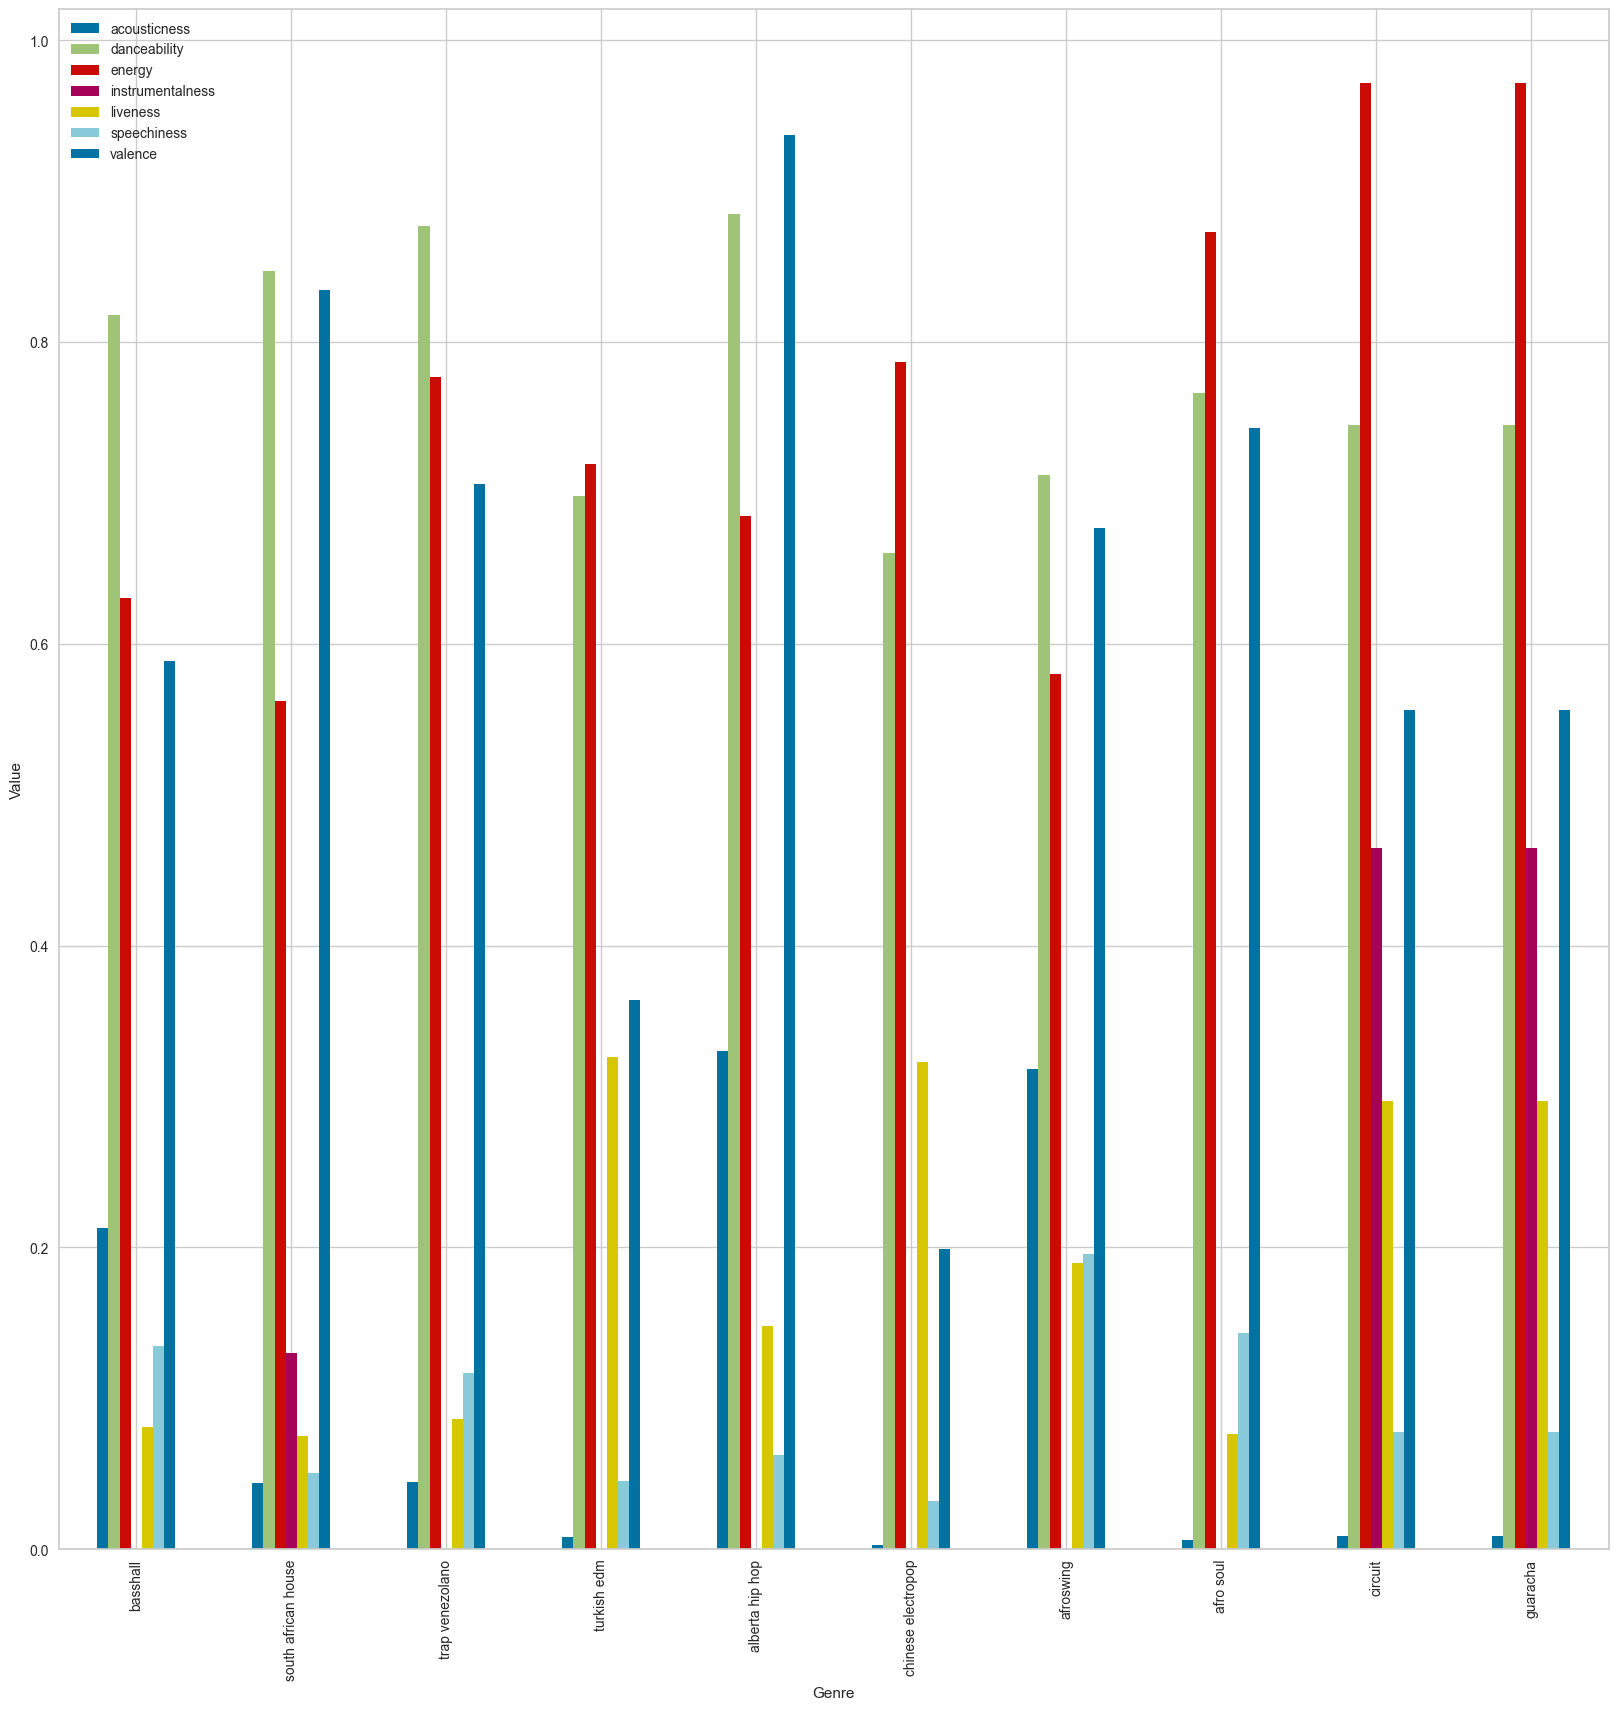

In [33]:
ax = top10_genres.plot(x='genres', y=['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'valence'], kind="bar", width=0.5)
ax.set_xlabel('Genre')
ax.set_ylabel('Value')
plt.show()

In [34]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
data['genres'] = data['genres'].astype(str)

# Convert the list of genres for each song into a string representation
data['genres'] = data['genres'].apply(lambda x: ' '.join(x))
# Use one-hot encoding to convert the genres into binary features
vectorizer = CountVectorizer(binary=True)
X_genres = vectorizer.fit_transform(data['genres']).toarray()

# Combine the genre features with the other song features
X = pd.concat([data.drop('genres', axis=1), pd.DataFrame(X_genres)], axis=1)


# Build a recommendation model
X_train = train_df.drop(['id', 'name', 'artists', 'playlist', 'user_id', 'release_date'], axis=1)
X_train = train_df.drop(['id', 'name', 'artists', 'playlist', 'user_id','release_date'], axis=1)
y_train = train_df['playlist']
y_test = test_df['playlist']


cos_sim = cosine_similarity(X_train)


# Get the top 10 most similar songs to a given song
def get_recommendations(song_id):
    idx = train_df[train_df['id'] == song_id].index[0]
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    song_indices = [i[0] for i in sim_scores]
    return list(train_df.iloc[song_indices]['id'])

# Generate a playlist based on user preferences
preferred_genres = ['rock', 'pop']

# Filter the dataset by the preferred genres
filtered_df = data[data[preferred_genres].any(axis=1)]

# Compute cosine similarity between songs based on their features and genres
filtered_cos_sim = cosine_similarity(filtered_df.drop(['id', 'name', 'artists', 'playlist'], axis=1))

# Get the top 10 songs that match the preferred genres and features
filtered_df['score'] = filtered_df[preferred_genres].sum(axis=1)
recommended_songs = filtered_df.nlargest(10, 'score')['id']

print(recommended_songs)